# Task 2. Julia set

Daniil Sherki

v0.0.1

###Task

For a fixed complex number c, the Julia set J(c) is the set of complex numbers for which the iterative process $z |-> z^2 + c$
does not diverge to infinity.

Step-by-step guide:
* fix a value of **c** (can be 0);
* implement the map, plot the evolution of **z** *(Re(z), Im(z))*;
* play around with values of c, see the change of evolution;
* for a given **c**:
1) do iterations max_iter times,
2) if at some point abs(z)>2 (for example) then return current iteration,
3) else return max_iter;
* plot the Julia set.

CRITERIA:
1. Make a two color plot, e.g black – the value of z converges, white – diverges (1 point)
2. Use more than two colors for bifurcation points (you can also create your own coloring logic or look for proposals on the internet or use the one provided in the step-by-step guide) (1 point)
3. Generate figure of Julia set (c = 1-r) where r is the golden ratio. Label the axes Re(z0) and Im(z0) (2 points)
4. Plot the figures for c=exp(ia), a = range(0,2pi) and write down the axes like in subtask 3, create animation of these figures slowly changing the value of a (3 points)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import Image, display
import imageio
from natsort import natsorted
from tqdm import tqdm, notebook
import shutil

GOLDEN_RATIO = (1 + np.sqrt(5)) / 2
C_GOLDEN = 1 - GOLDEN_RATIO

import warnings
warnings.filterwarnings("ignore")

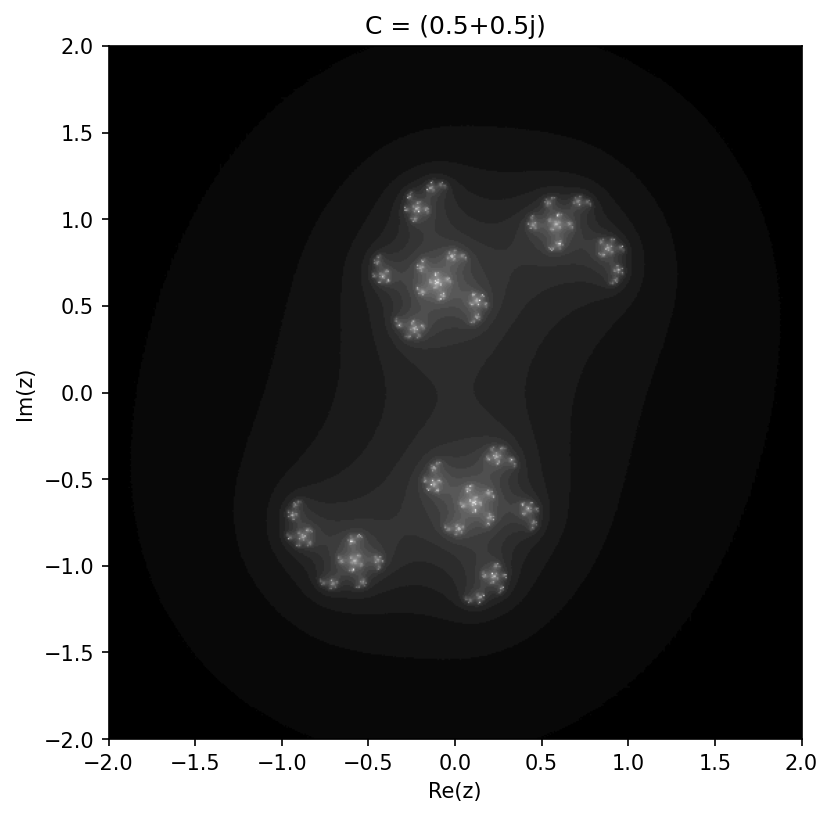

In [6]:
def plot_julia_two_colors(c, max_iter, extent, size):
    x = np.linspace(extent[0], extent[1], size)
    y = np.linspace(extent[2], extent[3], size)
    julia_set = np.zeros((size, size), dtype = np.uint8)

    for i in range(x.size):
        for j in range(y.size):
            z = x[i] + y[j] * 1j
            for iter in range(1, max_iter):
                z = z*z + c
                if abs(z) > 2:
                    julia_set[j, i] = iter

    plt.figure(figsize = (6,6), dpi=150)
    plt.imshow(julia_set,
             extent=extent,
             cmap='gray')
    plt.xlabel('Re(z)')
    plt.ylabel('Im(z)')
    plt.title(f'C = {c}')

C = 0.5 + 0.5j
plot_julia_two_colors(C, 255, [-2,2,-2,2], 500)
plt.show()

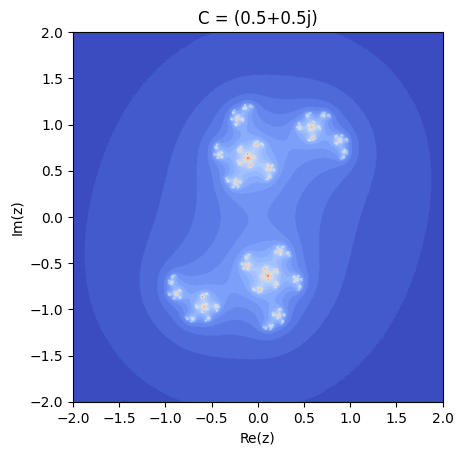

In [7]:
def plot_julia_multicolor(c, max_iter, extent, size, cmap = 'jet'):
    x = np.linspace(extent[0], extent[1], size)
    y = np.linspace(extent[2], extent[3], size)
    julia_set = np.zeros((size, size), dtype = np.uint8)

    for i in range(x.size):
        for j in range(y.size):
            z = x[i] + y[j] * 1j
            for iter in range(1, max_iter):
                z = z*z + c
                if abs(z) > 2:
                    julia_set[j, i] = iter

    plt.imshow(julia_set,
             extent=extent,
             cmap=cmap)
    plt.xlabel('Re(z)')
    plt.ylabel('Im(z)')
    plt.title(f'C = {c}')

C = 0.5 + 0.5j

plot_julia_multicolor(C, 255, [-2,2,-2,2], 500, 'coolwarm')
plt.show()

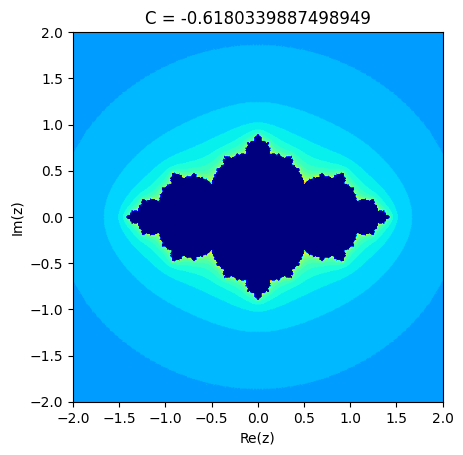

In [8]:
plot_julia_multicolor(C_GOLDEN, 255, [-2, 2, -2, 2], 500)

100%|██████████| 63/63 [12:30<00:00, 11.92s/it]


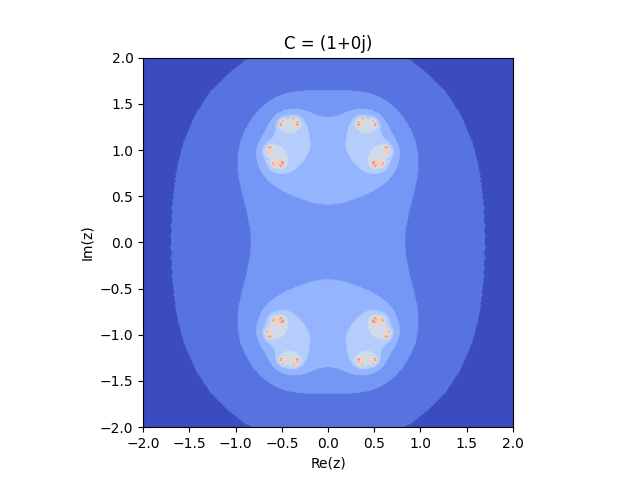

In [9]:
a_seq = np.arange(0,2*np.pi, 0.1)

folder = 'imgs'
gif_name = 'animation_julia.gif'

# shutil.rmtree(folder)
os.makedirs(folder, exist_ok=True)
images = []

for i,a in tqdm(enumerate(a_seq), total=len(a_seq)):
    c = np.exp(1j * a)
    plot_julia_multicolor(c, 255, [-2,2,-2,2], 500, 'coolwarm')
    image_file_name = f'{folder}/js_{i}.png'
    plt.savefig(image_file_name)
    images.append(imageio.v2.imread(image_file_name))
    plt.close()

imageio.mimsave(gif_name, images)
with open(gif_name, "rb") as f:
    display(Image(data=f.read(), format="gif"))


In [ ]:
# end
